In [1]:
from scipy.stats import poisson
import numpy as np
from matplotlib import pyplot as plt

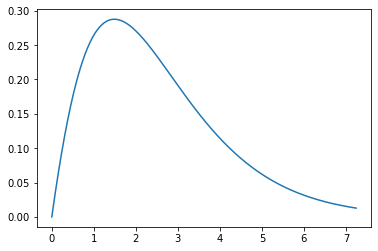

In [104]:
from scipy.stats import norm

N = 2
low = 1
high = low + N
mid = low + N/2
std = np.sqrt(mid)
n = low + np.arange(N)
w = norm.pdf(n, loc=mid, scale=std)
w = w/w.sum()
x = np.linspace(np.maximum(low-std*3,0), high + std*3, 500)

pn = w[None, :]*poisson.pmf(n[None, :], x[:, None])
p = np.sum(pn, axis=1)

plt.plot(x, p)

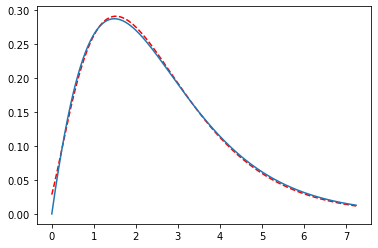

array([1.70185913, 1.00050408, 0.17696447])

In [105]:
from scipy.special import gamma
from scipy.optimize import curve_fit

def p_approx(x, n, a, b):
    return np.exp(-(a*x+b))*(a*x+b)**(n)/gamma(n+1)

popt, _ = curve_fit(p_approx, x, p, p0=[mid, 1, 0])

plt.plot(x, p_approx(x, *popt), 'r--')
plt.plot(x, p)
plt.show()
popt

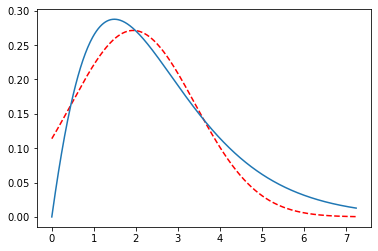

(array([1.9375802 , 1.47013782]), [2.5621765008857977, 1.6006800120217026])

In [106]:
from scipy.stats import norm
from scipy.optimize import curve_fit

x_max = np.sum(w*(n+1))
x_std = np.sqrt(np.sum(w*(n+1)))
mask = (x > x_max - 2*x_std) & (x < x_max + 2*x_std)

popt, _ = curve_fit(norm.pdf, x[mask], p[mask], p0=[mid, std])
# popt = [x_max, x_std]
plt.plot(x, norm.pdf(x, *popt), 'r--')
# plt.plot(x, norm.pdf(x, *popt), 'r--')
plt.plot(x, p)
plt.show()
popt, [x_max, x_std]